In [ ]:
import numpy as np
import pandas as pd

In [ ]:
movie_data = pd.read_csv('Movie.csv', header=None, names = ['text','sentiment'])
yelp_data = pd.read_csv('yelp_short.csv', header=None, names=['sentiment', 'text'])
twitter_data = pd.read_csv('train_150k.txt', sep='\t', names=('sentiment', 'text'))

In [ ]:
movie_data.describe()
len(movie_data)

50000

In [ ]:
len(yelp_data)

100801

In [ ]:
len(twitter_data)

149985

In [ ]:
movie_data.head(5)

,text,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [ ]:
# Converting sentiment to numerical values: 0 for positive and 1 for negative
movie_data['sentiment'] = movie_data['sentiment'].apply(lambda x: 0 if x == 'positive' else 1)

# Display the first few rows of the cleaned data to verify changes
print(movie_data.head())

                                                text  sentiment
0  One of the other reviewers has mentioned that ...          0
1  A wonderful little production. <br /><br />The...          0
2  I thought this was a wonderful way to spend ti...          0
3  Basically there's a family where a little boy ...          1
4  Petter Mattei's "Love in the Time of Money" is...          0


In [ ]:
#'2' is positive and '1' is negative
yelp_data['sentiment'] = yelp_data['sentiment'].apply(lambda x: 0 if x == 2 else 1)
# Reordering columns so that 'text' comes first
yelp_data = yelp_data[['text', 'sentiment']]
# Display the first few rows of the cleaned data to verify changes
print(yelp_data.head())

                                                text  sentiment
0  Unfortunately, the frustration of being Dr. Go...          1
1  You really can't go wrong when you eat here an...          0
2  This place can get pretty busy and with the lo...          0
3  Good food but charges on check were more than ...          1
4  Loose the annoying, driver distracting sign sp...          1


In [ ]:
# Complete the twitter data as 0 in dataset is negative and we have 0 as positive
twitter_data['sentiment'] = twitter_data['sentiment'].apply(lambda x: 1 if x == 0 else 0)

In [ ]:
twitter_data.head(5)

,sentiment,text
0,1,Starting back at work today Looks like it'l...
1,0,Sugar levels dropping... munchies setting in. ...
2,0,@karineb22 yeah!!! have a great summer break!
3,0,hannah montana was very good. now going to re...
4,0,"@Mayra326 aww, have fun! I just had my 3D las..."


In [ ]:
movie_data.head(5)

,text,sentiment
0,One of the other reviewers has mentioned that ...,0
1,A wonderful little production. <br /><br />The...,0
2,I thought this was a wonderful way to spend ti...,0
3,Basically there's a family where a little boy ...,1
4,"Petter Mattei's ""Love in the Time of Money"" is...",0


In [ ]:
yelp_data.head(5)

,text,sentiment
0,"Unfortunately, the frustration of being Dr. Go...",1
1,You really can't go wrong when you eat here an...,0
2,This place can get pretty busy and with the lo...,0
3,Good food but charges on check were more than ...,1
4,"Loose the annoying, driver distracting sign sp...",1


In [ ]:
movie_data['source'] = '1'
yelp_data['source'] = '2'
twitter_data['source'] = '3'

In [ ]:
movie_data['review'] = '1'
yelp_data['review'] = '1'
twitter_data['review'] = '0'

In [ ]:
movie_data.head(5)



,text,sentiment,source,review
0,One of the other reviewers has mentioned that ...,0,1,1
1,A wonderful little production. <br /><br />The...,0,1,1
2,I thought this was a wonderful way to spend ti...,0,1,1
3,Basically there's a family where a little boy ...,1,1,1
4,"Petter Mattei's ""Love in the Time of Money"" is...",0,1,1


In [ ]:
yelp_data.head(5)



,text,sentiment,source,review
0,"Unfortunately, the frustration of being Dr. Go...",1,2,1
1,You really can't go wrong when you eat here an...,0,2,1
2,This place can get pretty busy and with the lo...,0,2,1
3,Good food but charges on check were more than ...,1,2,1
4,"Loose the annoying, driver distracting sign sp...",1,2,1


In [ ]:
twitter_data.head(5)

,sentiment,text,source,review
0,1,Starting back at work today Looks like it'l...,3,0
1,0,Sugar levels dropping... munchies setting in. ...,3,0
2,0,@karineb22 yeah!!! have a great summer break!,3,0
3,0,hannah montana was very good. now going to re...,3,0
4,0,"@Mayra326 aww, have fun! I just had my 3D las...",3,0


In [ ]:
merged_df = pd.concat([twitter_data, yelp_data, movie_data])

# Display the merged DataFrame
print(merged_df)

       sentiment                                               text source  \
0              1  Starting  back at work today   Looks like it'l...      3   
1              0  Sugar levels dropping... munchies setting in. ...      3   
2              0     @karineb22 yeah!!! have a great summer break!       3   
3              0  hannah montana was very good.  now going to re...      3   
4              0  @Mayra326 aww, have fun!  I just had my 3D las...      3   
...          ...                                                ...    ...   
49995          0  I thought this movie did a down right good job...      1   
49996          1  Bad plot, bad dialogue, bad acting, idiotic di...      1   
49997          1  I am a Catholic taught in parochial elementary...      1   
49998          1  I'm going to have to disagree with the previou...      1   
49999          1  No one expects the Star Trek movies to be high...      1   

      review  
0          0  
1          0  
2          0  
3  

In [ ]:
len(merged_df)

300786

In [ ]:
len(yelp_data)+len(movie_data)+len(twitter_data)

300786

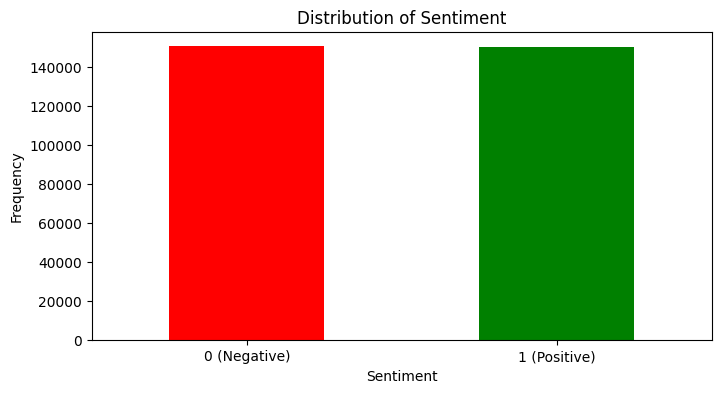

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

sentiment_counts = merged_df['sentiment'].value_counts()

# Plotting the bar chart for sentiment distribution
plt.figure(figsize=(8, 4))
sentiment_counts.plot(kind='bar', color=['red', 'green'])
plt.title('Distribution of Sentiment')
plt.xlabel('Sentiment')
plt.ylabel('Frequency')
plt.xticks(ticks=[0, 1], labels=['0 (Negative)', '1 (Positive)'], rotation=0)  # Add labels for clarity
plt.show()



In [ ]:
# Print count of each sentiment
print("Counts of each Sentiment:")
print(sentiment_counts)

# Display basic statistics for the 'sentiment' column
print("\nStatistics for the 'sentiment' column:")
print(merged_df['sentiment'].describe())

# For more detailed statistics specifically for binary categorical data
from scipy.stats import mode

# Print count of each source
print("Counts of each Source:")
source_counts = merged_df['source'].value_counts()
print(source_counts)


Counts of each Sentiment:
sentiment
0    150439
1    150347
Name: count, dtype: int64

Statistics for the 'sentiment' column:
count    300786.000000
mean          0.499847
std           0.500001
min           0.000000
25%           0.000000
50%           0.000000
75%           1.000000
max           1.000000
Name: sentiment, dtype: float64
Counts of each Source:
source
3    149985
2    100801
1     50000
Name: count, dtype: int64


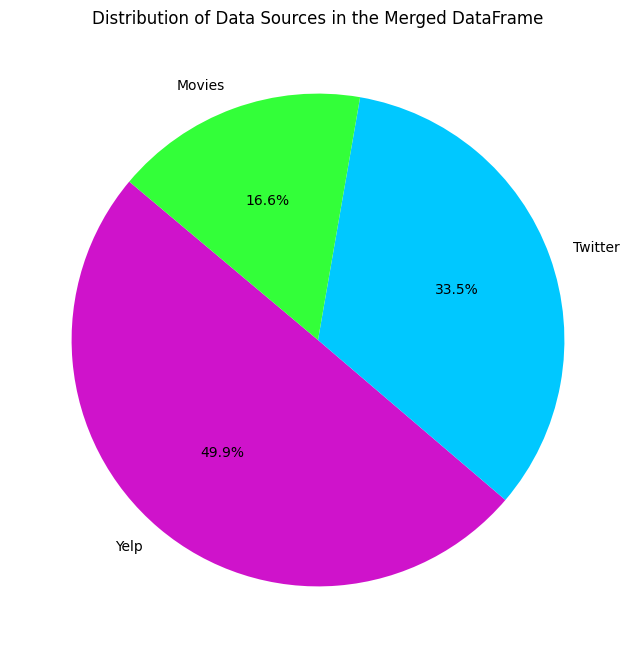

In [ ]:
import matplotlib.pyplot as plt
# Calculate the counts of each source
source_counts = merged_df['source'].value_counts()

# Setup for pie chart
colors = ['#cf13cb', '#00C8FF', '#33ff39'] # Colors for each section
labels = ['Yelp', 'Twitter', 'Movies']

# Plotting the pie chart for source distribution
plt.figure(figsize=(8, 8), facecolor='white')  # Set the figure background to white
plt.pie(source_counts, labels=labels, autopct='%1.1f%%', startangle=140, colors=colors)
plt.title('Distribution of Data Sources in the Merged DataFrame')
plt.show()

In [ ]:
# Print count of each source
print("Counts of each Data Source:")
print(source_counts)

# Display basic statistics for the 'source' column
print("\nStatistics for the 'source' column:")
print(merged_df['source'].describe())


Counts of each Data Source:
source
3    149985
2    100801
1     50000
Name: count, dtype: int64

Statistics for the 'source' column:
count     300786
unique         3
top            3
freq      149985
Name: source, dtype: object


In [ ]:
review_counts = merged_df['review'].value_counts()
print(review_counts)

review
1    150801
0    149985
Name: count, dtype: int64


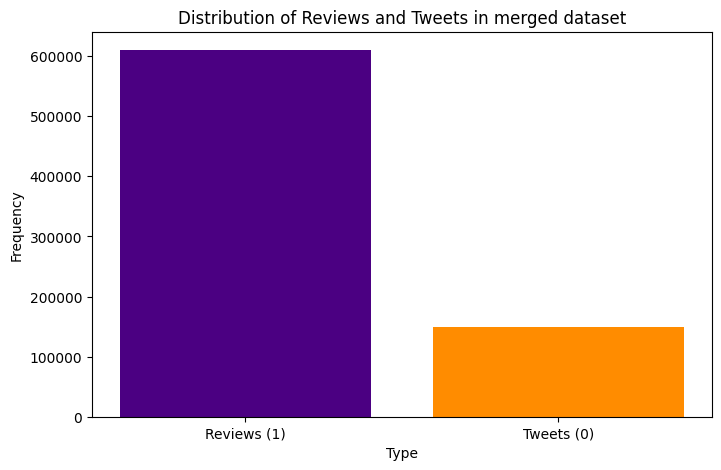

In [ ]:
import matplotlib.pyplot as plt

# It appears there may have been confusion in data handling or labeling. Let's directly use your output:
review_counts = {'Reviews (1)': 610001, 'Tweets (0)': 149985}

# Defining colors for the bars, as before
colors = ['#4b0082', '#ff8c00']  # Indigo and DarkOrange for contrast and visibility

# Plotting the bar chart for review distribution
plt.figure(figsize=(8, 5))
plt.bar(review_counts.keys(), review_counts.values(), color=colors)
plt.title('Distribution of Reviews and Tweets in merged dataset')
plt.xlabel('Type')
plt.ylabel('Frequency')
plt.xticks(rotation=0)
plt.show()



In [ ]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 300786 entries, 0 to 49999
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   sentiment  300786 non-null  int64 
 1   text       300786 non-null  object
 2   source     300786 non-null  object
 3   review     300786 non-null  object
dtypes: int64(1), object(3)
memory usage: 11.5+ MB


In [ ]:
merged_df.head()

,sentiment,text,source,review
0,1,Starting back at work today Looks like it'l...,3,0
1,0,Sugar levels dropping... munchies setting in. ...,3,0
2,0,@karineb22 yeah!!! have a great summer break!,3,0
3,0,hannah montana was very good. now going to re...,3,0
4,0,"@Mayra326 aww, have fun! I just had my 3D las...",3,0


### Text Cleaning ###

In [ ]:
import re
def clean_text(text):
    # Convert to lowercase to maintain consistency
    text = text.lower()

    # Remove URLs
    text = re.sub(r'http\S+', '', text)

    # Remove HTML tags
    text = re.sub(r'<.*?>', '', text)

    # Replace special characters and punctuation with a space
    text = re.sub(r'[^a-zA-Z0-9\s]', ' ', text)

    # Remove extra whitespaces
    text = re.sub(r'\s+', ' ', text).strip()

    return text

In [ ]:

merged_df['text'] = merged_df['text'].apply(clean_text)


print(merged_df['text'].head())

0    starting back at work today looks like it ll b...
1    sugar levels dropping munchies setting in luck...
2             karineb22 yeah have a great summer break
3    hannah montana was very good now going to read...
4     mayra326 aww have fun i just had my 3d last week
Name: text, dtype: object


### Making Equale number of tweets and Reviews ###




In [ ]:

import pandas as pd

# Calculating the number of instances in the smaller class
min_count = merged_df['review'].value_counts().min()

# Creating balanced DataFrame by downsampling
df_review = pd.concat([
    merged_df[merged_df['review'] == '0'].sample(min_count, random_state=42),
    merged_df[merged_df['review'] == '1'].sample(min_count, random_state=42)
])

# Checking the balance
print(df_review['review'].value_counts())

# Example usage with the balanced DataFrame
print(df_review.info())


review
0    149985
1    149985
Name: count, dtype: int64
<class 'pandas.core.frame.DataFrame'>
Index: 299970 entries, 133846 to 64323
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   sentiment  299970 non-null  int64 
 1   text       299970 non-null  object
 2   source     299970 non-null  object
 3   review     299970 non-null  object
dtypes: int64(1), object(3)
memory usage: 11.4+ MB
None


In [ ]:
df_review.head()

,sentiment,text,source,review
133846,0,socali86 haha no shit i need a vacation too ma...,3,0
100616,0,ahmeeeee spore yeah i m really super a lot try...,3,0
129499,0,mornin all beauty here i m heading to the cape...,3,0
56620,0,got back from such a fun trip with my cousin t...,3,0
108698,1,i weigh 118lbs but i have the body of a 200lb ...,3,0


In [ ]:
print("\nCounts of each source:")
print(df_review['source'].value_counts())


Counts of each source:
source
3    149985
2    100281
1     49704
Name: count, dtype: int64


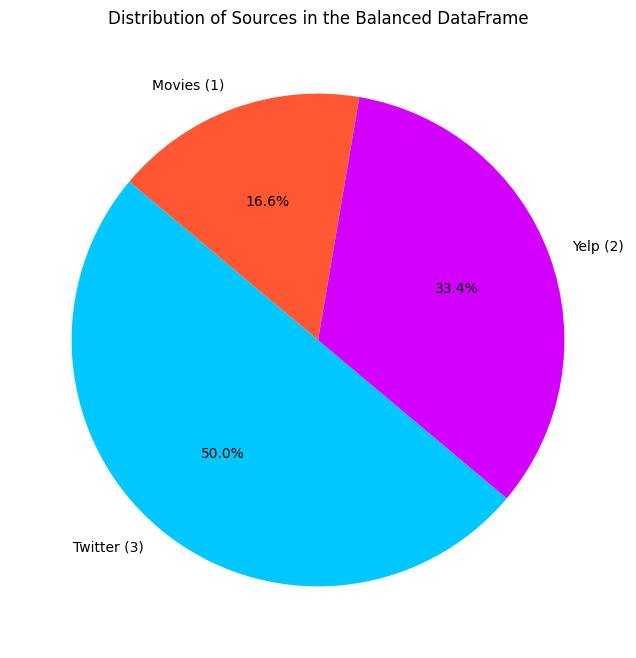

In [ ]:
source_counts = df_review['source'].value_counts()

# Defining colors for the pie chart
colors = ['#00C8FF', '#D300FF', '#FF5733']  # Neon blue, neon purple, neon orange

# Labels for each slice (Assuming source '3', '2', '1' correspond to these names)
labels = ['Twitter (3)', 'Yelp (2)', 'Movies (1)']  # Replace with actual source names if available

# Creating the pie chart
plt.figure(figsize=(8, 8))
plt.pie(source_counts, labels=labels, autopct='%1.1f%%', startangle=140, colors=colors)
plt.title('Distribution of Sources in the Balanced DataFrame')
plt.show()

In [ ]:
df_review.info()

<class 'pandas.core.frame.DataFrame'>
Index: 299970 entries, 133846 to 64323
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   sentiment  299970 non-null  int64 
 1   text       299970 non-null  object
 2   source     299970 non-null  object
 3   review     299970 non-null  object
dtypes: int64(1), object(3)
memory usage: 11.4+ MB


In [ ]:
print("\nCounts of each source:")
print(df_review['sentiment'].value_counts())


Counts of each source:
sentiment
0    150048
1    149922
Name: count, dtype: int64


sentiment
0    150048
1    149922
Name: count, dtype: int64


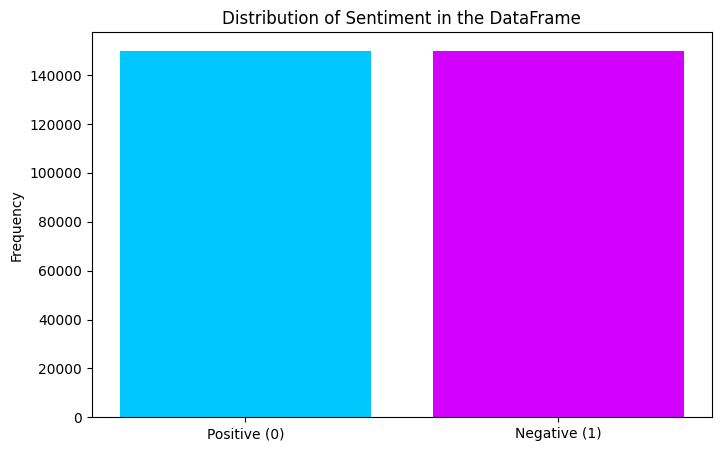

In [ ]:
sentiment_counts = df_review['sentiment'].value_counts()
print (sentiment_counts)
# Define colors for the bars
colors = ['#00C8FF', '#D300FF']  # Neon blue and neon purple

# Labels for each bar
labels = ['Positive (0)', 'Negative (1)']

# Creating the bar chart
plt.figure(figsize=(8, 5))
plt.bar(labels, sentiment_counts, color=colors)
plt.title('Distribution of Sentiment in the DataFrame')
plt.ylabel('Frequency')
plt.show()

### Logistic Regression ###

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report



# Splitting the data into training and temporary sets (temp set will be further split into validation and test)
X_train, X_temp, y_train, y_temp = train_test_split(
    df_review['text'],  # Text column as input
    df_review['sentiment'],  # Sentiment column as the target
    test_size=0.4,  # 40% of the data for temp (validation + test)
    random_state=42
)

# Splitting the temporary set into validation and test sets
X_val, X_test, y_val, y_test = train_test_split(
    X_temp,
    y_temp,
    test_size=0.5,  # Split the 40% temp data into two 20% sets for validation and test
    random_state=42
)

# Vectorizing text data
vectorizer = TfidfVectorizer(max_features=5000, stop_words='english')
X_train_tfidf = vectorizer.fit_transform(X_train)
X_val_tfidf = vectorizer.transform(X_val)
X_test_tfidf = vectorizer.transform(X_test)

# Initialize the Logistic Regression model
model = LogisticRegression()

# Train the model on the training data
model.fit(X_train_tfidf, y_train)

# Evaluate on the validation set
y_val_pred = model.predict(X_val_tfidf)
print("Validation Accuracy:", accuracy_score(y_val, y_val_pred))
print("Validation Classification Report:\n", classification_report(y_val, y_val_pred))

# Final evaluation on the test set (should only be done after model tuning)
y_test_pred = model.predict(X_test_tfidf)
print("Test Accuracy:", accuracy_score(y_test, y_test_pred))
print("Test Classification Report:\n", classification_report(y_test, y_test_pred))


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Validation Accuracy: 0.8131813181318132
Validation Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.83      0.82     29914
           1       0.82      0.80      0.81     30080

    accuracy                           0.81     59994
   macro avg       0.81      0.81      0.81     59994
weighted avg       0.81      0.81      0.81     59994

Test Accuracy: 0.8125479214588125
Test Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.83      0.81     29901
           1       0.82      0.80      0.81     30093

    accuracy                           0.81     59994
   macro avg       0.81      0.81      0.81     59994
weighted avg       0.81      0.81      0.81     59994



### Logistic Regression with Pipeline###

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline


# Splitting the data into training and temporary sets
X_train, X_temp, y_train, y_temp = train_test_split(
    df_review['text'],  # Text column as input
    df_review['sentiment'],  # Sentiment column as the target
    test_size=0.4,  # 40% of the data for temp (validation + test)
    random_state=42
)

# Splitting the temporary set into validation and test sets
X_val, X_test, y_val, y_test = train_test_split(
    X_temp,
    y_temp,
    test_size=0.5,  # Split the 40% temp data into two 20% sets for validation and test
    random_state=42
)

# Vectorizing text data
vectorizer = TfidfVectorizer(max_features=5000, stop_words='english')
X_train_tfidf = vectorizer.fit_transform(X_train)
X_val_tfidf = vectorizer.transform(X_val)
X_test_tfidf = vectorizer.transform(X_test)

# Create a pipeline that includes scaling and the logistic regression model
pipeline = make_pipeline(
    StandardScaler(with_mean=False),  # with_mean=False is necessary for sparse matrices from TfidfVectorizer
    LogisticRegression(max_iter=1000)
)

# Train the pipeline on the training data
pipeline.fit(X_train_tfidf, y_train)

# Evaluate on the validation set using the pipeline
y_val_pred = pipeline.predict(X_val_tfidf)
print("Validation Accuracy:", accuracy_score(y_val, y_val_pred))
print("Validation Classification Report:\n", classification_report(y_val, y_val_pred))
#
# Final evaluation on the test set
y_test_pred = pipeline.predict(X_test_tfidf)
print("Test Accuracy:", accuracy_score(y_test, y_test_pred))
print("Test Classification Report:\n", classification_report(y_test, y_test_pred))


Validation Accuracy: 0.8117145047838117
Validation Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.83      0.81     29914
           1       0.82      0.80      0.81     30080

    accuracy                           0.81     59994
   macro avg       0.81      0.81      0.81     59994
weighted avg       0.81      0.81      0.81     59994

Test Accuracy: 0.8102810281028103
Test Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.82      0.81     29901
           1       0.82      0.80      0.81     30093

    accuracy                           0.81     59994
   macro avg       0.81      0.81      0.81     59994
weighted avg       0.81      0.81      0.81     59994



### CNN ###

In [ ]:

import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Conv1D, GlobalMaxPooling1D, Dense
from tensorflow.keras.callbacks import EarlyStopping


X_train, X_temp, y_train, y_temp = train_test_split(
    df_review['text'],
    df_review['sentiment'],
    test_size=0.4,
    random_state=42
)
X_val, X_test, y_val, y_test = train_test_split(
    X_temp,
    y_temp,
    test_size=0.5,
    random_state=42
)

# Tokenizing text data
tokenizer = Tokenizer(num_words=1000)
tokenizer.fit_on_texts(X_train)
X_train_seq = tokenizer.texts_to_sequences(X_train)
X_val_seq = tokenizer.texts_to_sequences(X_val)
X_test_seq = tokenizer.texts_to_sequences(X_test)

# Padding sequences to ensure uniform input size
max_length = max(len(x) for x in X_train_seq)
X_train_pad = pad_sequences(X_train_seq, maxlen=max_length)
X_val_pad = pad_sequences(X_val_seq, maxlen=max_length)
X_test_pad = pad_sequences(X_test_seq, maxlen=max_length)

# Model parameters
vocab_size = len(tokenizer.word_index) + 1
embedding_dim = 50  # Dimensionality of the embedding layer

# Building a simpler CNN model
model = Sequential()
model.add(Embedding(input_dim=vocab_size, output_dim=embedding_dim, input_length=max_length))
model.add(Conv1D(64, 3, activation='relu'))  # Reduced number of filters and kernel size
model.add(GlobalMaxPooling1D())
model.add(Dense(1, activation='sigmoid'))  # Directly to output for binary classification

# Compiling the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Early stopping to prevent overfitting
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

# Training the model
history = model.fit(
    X_train_pad, y_train,
    epochs=10,
    batch_size=128,
    validation_data=(X_val_pad, y_val),
    callbacks=[early_stopping]
)

# Evaluating the model on the test set
test_loss, test_accuracy = model.evaluate(X_test_pad, y_test)
print("Test Accuracy:", test_accuracy)


Epoch 1/10
1407/1407 [==============================] - 33s 23ms/step - loss: 0.4582 - accuracy: 0.7778 - val_loss: 0.4091 - val_accuracy: 0.8083
Epoch 2/10
1407/1407 [==============================] - 11s 8ms/step - loss: 0.3962 - accuracy: 0.8142 - val_loss: 0.3974 - val_accuracy: 0.8136
Epoch 3/10
1407/1407 [==============================] - 11s 8ms/step - loss: 0.3742 - accuracy: 0.8273 - val_loss: 0.3894 - val_accuracy: 0.8187
Epoch 4/10
1407/1407 [==============================] - 11s 8ms/step - loss: 0.3569 - accuracy: 0.8364 - val_loss: 0.3889 - val_accuracy: 0.8187
Epoch 5/10
1407/1407 [==============================] - 10s 7ms/step - loss: 0.3422 - accuracy: 0.8446 - val_loss: 0.3886 - val_accuracy: 0.8194
Epoch 6/10
1407/1407 [==============================] - 10s 7ms/step - loss: 0.3285 - accuracy: 0.8527 - val_loss: 0.3926 - val_accuracy: 0.8201
Epoch 7/10
1407/1407 [==============================] - 11s 8ms/step - loss: 0.3163 - accuracy: 0.8585 - val_loss: 0.3972 - val_a

### CNN with Increased Vocab Size###



In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Conv1D, GlobalMaxPooling1D, Dense
from tensorflow.keras.callbacks import EarlyStopping


X_train, X_temp, y_train, y_temp = train_test_split(
    df_review['text'],
    df_review['sentiment'],
    test_size=0.4,
    random_state=42
)
X_val, X_test, y_val, y_test = train_test_split(
    X_temp,
    y_temp,
    test_size=0.5,
    random_state=42
)

# Tokenizing text data with increased vocabulary size
tokenizer = Tokenizer(num_words=5000)  # Increase the vocabulary size
tokenizer.fit_on_texts(X_train)
X_train_seq = tokenizer.texts_to_sequences(X_train)
X_val_seq = tokenizer.texts_to_sequences(X_val)
X_test_seq = tokenizer.texts_to_sequences(X_test)

# Padding sequences to ensure uniform input size
max_length = max(len(x) for x in X_train_seq)
X_train_pad = pad_sequences(X_train_seq, maxlen=max_length)
X_val_pad = pad_sequences(X_val_seq, maxlen=max_length)
X_test_pad = pad_sequences(X_test_seq, maxlen=max_length)

# Model parameters
vocab_size = len(tokenizer.word_index) + 1
embedding_dim = 50  # Dimensionality of the embedding layer

# Building a simpler CNN model
model = Sequential()
model.add(Embedding(input_dim=vocab_size, output_dim=embedding_dim, input_length=max_length))
model.add(Conv1D(64, 3, activation='relu'))  # Reduced number of filters and kernel size
model.add(GlobalMaxPooling1D())
model.add(Dense(1, activation='sigmoid'))  # Directly to output for binary classification

# Compiling the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Early stopping to prevent overfitting
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

# Training the model
history = model.fit(
    X_train_pad, y_train,
    epochs=10,
    batch_size=128,
    validation_data=(X_val_pad, y_val),
    callbacks=[early_stopping]
)

# Evaluating the model on the test set
test_loss, test_accuracy = model.evaluate(X_test_pad, y_test)
print("Test Accuracy:", test_accuracy)


Epoch 1/10
1407/1407 [==============================] - 96s 67ms/step - loss: 0.4245 - accuracy: 0.7998 - val_loss: 0.3648 - val_accuracy: 0.8363
Epoch 2/10
1407/1407 [==============================] - 26s 18ms/step - loss: 0.3387 - accuracy: 0.8495 - val_loss: 0.3492 - val_accuracy: 0.8454
Epoch 3/10
1407/1407 [==============================] - 20s 14ms/step - loss: 0.3030 - accuracy: 0.8686 - val_loss: 0.3485 - val_accuracy: 0.8444
Epoch 4/10
1407/1407 [==============================] - 17s 12ms/step - loss: 0.2716 - accuracy: 0.8850 - val_loss: 0.3601 - val_accuracy: 0.8423
Epoch 5/10
1407/1407 [==============================] - 15s 11ms/step - loss: 0.2422 - accuracy: 0.9004 - val_loss: 0.3731 - val_accuracy: 0.8399
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3498 - accuracy: 0.8429
Test Accuracy: 0.842850923538208


### Dense CNN model ###

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Conv1D, GlobalMaxPooling1D, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau


X_train, X_temp, y_train, y_temp = train_test_split(
    df_review['text'],
    df_review['sentiment'],
    test_size=0.4,
    random_state=42
)
X_val, X_test, y_val, y_test = train_test_split(
    X_temp,
    y_temp,
    test_size=0.5,
    random_state=42
)

# Tokenizing text data with increased vocabulary size
tokenizer = Tokenizer(num_words=5000)
tokenizer.fit_on_texts(X_train)
X_train_seq = tokenizer.texts_to_sequences(X_train)
X_val_seq = tokenizer.texts_to_sequences(X_val)
X_test_seq = tokenizer.texts_to_sequences(X_test)

# Padding sequences to ensure uniform input size
max_length = max(len(x) for x in X_train_seq)
X_train_pad = pad_sequences(X_train_seq, maxlen=max_length)
X_val_pad = pad_sequences(X_val_seq, maxlen=max_length)
X_test_pad = pad_sequences(X_test_seq, maxlen=max_length)

# Model parameters
vocab_size = len(tokenizer.word_index) + 1
embedding_dim = 50

# Building a refined CNN model
model = Sequential()
model.add(Embedding(input_dim=vocab_size, output_dim=embedding_dim, input_length=max_length))
model.add(Conv1D(64, 5, activation='relu'))  # Changed kernel size to 5
model.add(GlobalMaxPooling1D())
model.add(Dense(50, activation='relu'))  # Additional Dense layer
model.add(Dropout(0.5))  # Dropout to prevent overfitting
model.add(Dense(1, activation='sigmoid'))

# Compiling the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Early stopping and learning rate reduction
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=2, min_lr=0.001)

# Training the model with adjusted settings
history = model.fit(
    X_train_pad, y_train,
    epochs=20,  # Increased epochs
    batch_size=64,  # Reduced batch size for more updates
    validation_data=(X_val_pad, y_val),
    callbacks=[early_stopping, reduce_lr]
)

# Evaluating the model on the test set
test_loss, test_accuracy = model.evaluate(X_test_pad, y_test)
print("Test Accuracy:", test_accuracy)


Epoch 1/20
2813/2813 [==============================] - 119s 41ms/step - loss: 0.4140 - accuracy: 0.8071 - val_loss: 0.3515 - val_accuracy: 0.8409 - lr: 0.0010
Epoch 2/20
2813/2813 [==============================] - 31s 11ms/step - loss: 0.3252 - accuracy: 0.8574 - val_loss: 0.3426 - val_accuracy: 0.8466 - lr: 0.0010
Epoch 3/20
2813/2813 [==============================] - 23s 8ms/step - loss: 0.2759 - accuracy: 0.8810 - val_loss: 0.3493 - val_accuracy: 0.8448 - lr: 0.0010
Epoch 4/20
2813/2813 [==============================] - 21s 7ms/step - loss: 0.2309 - accuracy: 0.9010 - val_loss: 0.3945 - val_accuracy: 0.8407 - lr: 0.0010
Epoch 5/20
2813/2813 [==============================] - 19s 7ms/step - loss: 0.1930 - accuracy: 0.9167 - val_loss: 0.4529 - val_accuracy: 0.8375 - lr: 0.0010
Epoch 6/20
2813/2813 [==============================] - 18s 7ms/step - loss: 0.1654 - accuracy: 0.9289 - val_loss: 0.4906 - val_accuracy: 0.8338 - lr: 0.0010
Epoch 7/20
1875/1875 [===========================

### Word Cloud ###

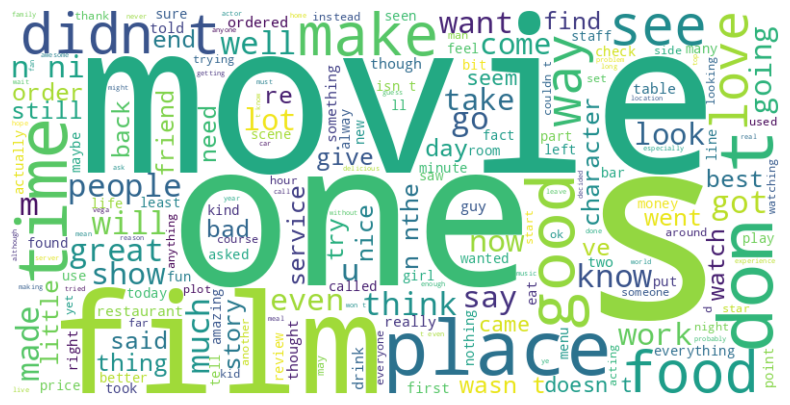

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud
# Concatenate all the text from the 'text' column in your dataframe
all_text = ' '.join(df_review['text'])

# Generate the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white', max_words=200).generate(all_text)

# Display the word cloud using matplotlib
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


### CNN with Word Cloud###

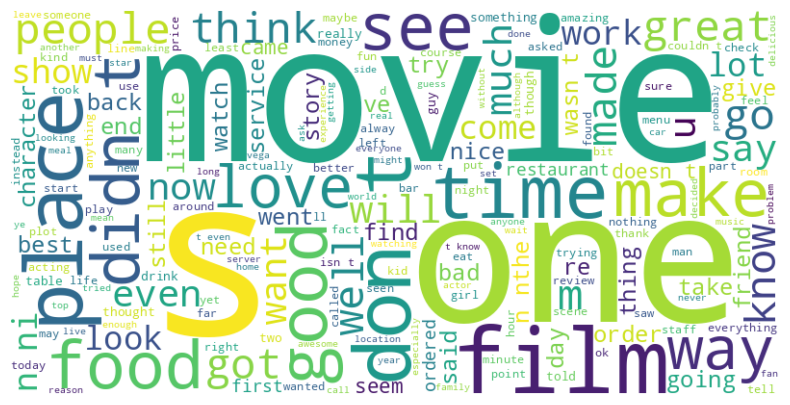

Epoch 1/20
2813/2813 [==============================] - 114s 40ms/step - loss: 0.4069 - accuracy: 0.8116 - val_loss: 0.3433 - val_accuracy: 0.8467 - lr: 0.0010
Epoch 2/20
2813/2813 [==============================] - 40s 14ms/step - loss: 0.2433 - accuracy: 0.9019 - val_loss: 0.3642 - val_accuracy: 0.8436 - lr: 0.0010
Epoch 3/20
2813/2813 [==============================] - 28s 10ms/step - loss: 0.1182 - accuracy: 0.9571 - val_loss: 0.4827 - val_accuracy: 0.8370 - lr: 0.0010
Epoch 4/20
2813/2813 [==============================] - 26s 9ms/step - loss: 0.0591 - accuracy: 0.9792 - val_loss: 0.6020 - val_accuracy: 0.8307 - lr: 0.0010
Epoch 5/20
2813/2813 [==============================] - 26s 9ms/step - loss: 0.0363 - accuracy: 0.9874 - val_loss: 0.6797 - val_accuracy: 0.8247 - lr: 0.0010
Epoch 6/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3426 - accuracy: 0.8464
Test Accuracy: 0.8464013338088989


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Conv1D, GlobalMaxPooling1D, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from collections import Counter
from wordcloud import WordCloud

# Making wordcloud
all_text = ' '.join(df_review['text'])
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_text)
high_freq_words = {word: freq for word, freq in wordcloud.words_.items()}

# Generate the word cloud visualization
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


X_train, X_temp, y_train, y_temp = train_test_split(
    df_review['text'],
    df_review['sentiment'],
    test_size=0.4,
    random_state=42
)
X_val, X_test, y_val, y_test = train_test_split(
    X_temp,
    y_temp,
    test_size=0.5,
    random_state=42
)

# Tokenizing text data focusing on high-frequency words
tokenizer = Tokenizer()  # Using full vocabulary based on actual word frequencies
tokenizer.fit_on_texts(X_train)
X_train_seq = tokenizer.texts_to_sequences(X_train)
X_val_seq = tokenizer.texts_to_sequences(X_val)
X_test_seq = tokenizer.texts_to_sequences(X_test)

# Padding sequences to ensure uniform input size
max_length = max(max(len(x) for x in X_train_seq), max(len(x) for x in X_val_seq), max(len(x) for x in X_test_seq))
X_train_pad = pad_sequences(X_train_seq, maxlen=max_length)
X_val_pad = pad_sequences(X_val_seq, maxlen=max_length)
X_test_pad = pad_sequences(X_test_seq, maxlen=max_length)

# Model parameters
vocab_size = len(tokenizer.word_index) + 1
embedding_dim = 50

# Building a refined CNN model
model = Sequential()
model.add(Embedding(input_dim=vocab_size, output_dim=embedding_dim, input_length=max_length))
model.add(Conv1D(64, 5, activation='relu'))
model.add(GlobalMaxPooling1D())
model.add(Dense(50, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

# Compiling the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Early stopping and learning rate reduction
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=2, min_lr=0.001)

# Training the model with adjusted settings
history = model.fit(
    X_train_pad, y_train,
    epochs=20,
    batch_size=64,
    validation_data=(X_val_pad, y_val),
    callbacks=[early_stopping, reduce_lr]
)

# Evaluating the model on the test set
test_loss, test_accuracy = model.evaluate(X_test_pad, y_test)
print("Test Accuracy:", test_accuracy)


###TF-IDF (Term frequency-inverse document frequency) Filtering Word Cloud##

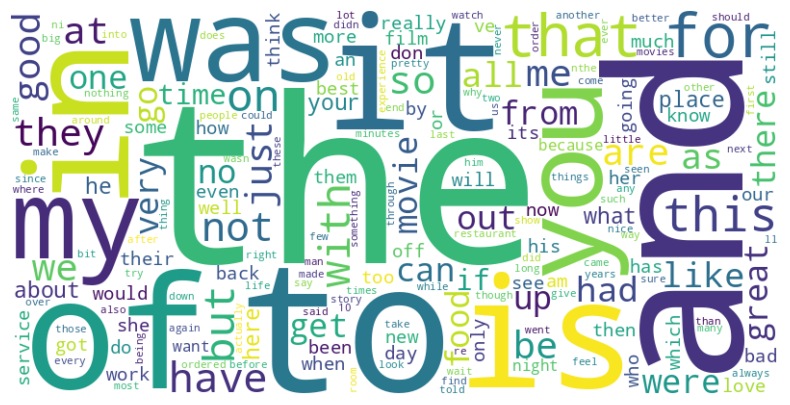

In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Example using TfidfVectorizer to prioritize words by their TF-IDF scores
tfidf_vectorizer = TfidfVectorizer(max_df=0.8, min_df=2, max_features=200)
tfidf_matrix = tfidf_vectorizer.fit_transform(df_review['text'])

# Get feature names and corresponding TF-IDF scores
feature_names = tfidf_vectorizer.get_feature_names_out()
tfidf_scores = tfidf_matrix.sum(axis=0).A1  # Sum scores across all documents
word_scores = dict(zip(feature_names, tfidf_scores))

# Generate the word cloud using scores from TF-IDF
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_scores)

# Display the word cloud using matplotlib
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


### CNN with TF-IDF###

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Conv1D, GlobalMaxPooling1D, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau


X_train, X_temp, y_train, y_temp = train_test_split(
    df_review['text'],
    df_review['sentiment'],
    test_size=0.4,
    random_state=42
)
X_val, X_test, y_val, y_test = train_test_split(
    X_temp,
    y_temp,
    test_size=0.5,
    random_state=42
)

# Use TfidfVectorizer to find important words
tfidf_vectorizer = TfidfVectorizer(max_df=0.8, min_df=2)
tfidf_matrix = tfidf_vectorizer.fit_transform(X_train)
feature_names = tfidf_vectorizer.get_feature_names_out()

# Initialize Tokenizer with the top N important words based on TF-IDF
top_n = 5000
sorted_features = sorted(zip(feature_names, tfidf_matrix.sum(axis=0).A1), key=lambda x: x[1], reverse=True)
top_features = [word for word, _ in sorted_features[:top_n]]
tokenizer = Tokenizer()
tokenizer.fit_on_texts(top_features)

# Tokenize and pad the sequences
X_train_seq = tokenizer.texts_to_sequences(X_train)
X_val_seq = tokenizer.texts_to_sequences(X_val)
X_test_seq = tokenizer.texts_to_sequences(X_test)

max_length = max(max(len(x) for x in X_train_seq), max(len(x) for x in X_val_seq), max(len(x) for x in X_test_seq))
X_train_pad = pad_sequences(X_train_seq, maxlen=max_length)
X_val_pad = pad_sequences(X_val_seq, maxlen=max_length)
X_test_pad = pad_sequences(X_test_seq, maxlen=max_length)

# Model parameters
vocab_size = len(tokenizer.word_index) + 1
embedding_dim = 50

# Building a refined CNN model
model = Sequential()
model.add(Embedding(input_dim=vocab_size, output_dim=embedding_dim, input_length=max_length))
model.add(Conv1D(64, 5, activation='relu'))
model.add(GlobalMaxPooling1D())
model.add(Dense(50, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

# Compiling the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Early stopping and learning rate reduction
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=2, min_lr=0.001)

# Training the model with adjusted settings
history = model.fit(
    X_train_pad, y_train,
    epochs=20,
    batch_size=64,
    validation_data=(X_val_pad, y_val),
    callbacks=[early_stopping, reduce_lr]
)

# Evaluating the model on the test set
test_loss, test_accuracy = model.evaluate(X_test_pad, y_test)
print("Test Accuracy:", test_accuracy)


Epoch 1/20
2813/2813 [==============================] - 114s 40ms/step - loss: 0.4135 - accuracy: 0.8071 - val_loss: 0.3587 - val_accuracy: 0.8378 - lr: 0.0010
Epoch 2/20
2813/2813 [==============================] - 29s 10ms/step - loss: 0.3238 - accuracy: 0.8578 - val_loss: 0.3516 - val_accuracy: 0.8429 - lr: 0.0010
Epoch 3/20
2813/2813 [==============================] - 23s 8ms/step - loss: 0.2755 - accuracy: 0.8802 - val_loss: 0.3585 - val_accuracy: 0.8436 - lr: 0.0010
Epoch 4/20
2813/2813 [==============================] - 21s 8ms/step - loss: 0.2293 - accuracy: 0.9011 - val_loss: 0.3939 - val_accuracy: 0.8388 - lr: 0.0010
Epoch 5/20
2813/2813 [==============================] - 20s 7ms/step - loss: 0.1891 - accuracy: 0.9187 - val_loss: 0.4643 - val_accuracy: 0.8343 - lr: 0.0010
Epoch 6/20
2813/2813 [==============================] - 19s 7ms/step - loss: 0.1595 - accuracy: 0.9314 - val_loss: 0.5130 - val_accuracy: 0.8300 - lr: 0.0010
Epoch 7/20
1875/1875 [===========================

### WORD2VEC ####

In [ ]:
!pip install tensorflow


In [ ]:
import time
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from gensim.models import Word2Vec
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, GlobalAveragePooling1D, Dense
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import precision_score, recall_score, f1_score

# Start the timer
start_time = time.time()
X_train, X_temp, y_train, y_temp = train_test_split(
    df_review['text'],
    df_review['sentiment'],
    test_size=0.4,
    random_state=42
)
X_val, X_test, y_val, y_test = train_test_split(
    X_temp,
    y_temp,
    test_size=0.5,
    random_state=42
)

# Tokenize the text data
tokenizer = Tokenizer(num_words=5000)
tokenizer.fit_on_texts(X_train)
X_train_seq = tokenizer.texts_to_sequences(X_train)
X_val_seq = tokenizer.texts_to_sequences(X_val)
X_test_seq = tokenizer.texts_to_sequences(X_test)

max_length = max(max(len(x) for x in X_train_seq), max(len(x) for x in X_val_seq), max(len(x) for x in X_test_seq))
X_train_pad = pad_sequences(X_train_seq, maxlen=max_length)
X_val_pad = pad_sequences(X_val_seq, maxlen=max_length)
X_test_pad = pad_sequences(X_test_seq, maxlen=max_length)

# Train a Word2Vec model
tokenized_texts = [text.split() for text in df_review['text']]
word2vec_model = Word2Vec(tokenized_texts, vector_size=100, window=5, min_count=1, workers=4)

# Prepare the embedding matrix
vocab_size = len(tokenizer.word_index) + 1
embedding_matrix = np.zeros((vocab_size, 100))
for word, i in tokenizer.word_index.items():
    if word in word2vec_model.wv:
        embedding_vector = word2vec_model.wv[word]
        if embedding_vector is not None:
            embedding_matrix[i] = embedding_vector

# Build the neural network
model = Sequential()
model.add(Embedding(input_dim=vocab_size,
                    output_dim=100,
                    weights=[embedding_matrix],
                    input_length=max_length,
                    trainable=False))
model.add(GlobalAveragePooling1D())
model.add(Dense(64, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Set early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

# Train the model
model.fit(X_train_pad, y_train, epochs=20, batch_size=64,
          validation_data=(X_val_pad, y_val),
          callbacks=[early_stopping])

# Evaluate on the test set
test_loss, test_accuracy = model.evaluate(X_test_pad, y_test)

# Predict on the test set
y_pred = (model.predict(X_test_pad) > 0.5).astype("int32")

# Calculate precision, recall, and f1 score
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# End the timer and calculate total time taken
end_time = time.time()
execution_time = end_time - start_time

print("Test Accuracy with Word2Vec:", test_accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("Total Execution Time:", execution_time)


Epoch 1/20
2813/2813 [==============================] - 11s 4ms/step - loss: 0.5640 - accuracy: 0.7139 - val_loss: 0.5124 - val_accuracy: 0.7556
Epoch 2/20
2813/2813 [==============================] - 10s 4ms/step - loss: 0.5006 - accuracy: 0.7580 - val_loss: 0.4870 - val_accuracy: 0.7704
Epoch 3/20
2813/2813 [==============================] - 11s 4ms/step - loss: 0.4837 - accuracy: 0.7663 - val_loss: 0.4793 - val_accuracy: 0.7716
Epoch 4/20
2813/2813 [==============================] - 10s 4ms/step - loss: 0.4746 - accuracy: 0.7714 - val_loss: 0.4694 - val_accuracy: 0.7731
Epoch 5/20
2813/2813 [==============================] - 10s 4ms/step - loss: 0.4683 - accuracy: 0.7742 - val_loss: 0.4608 - val_accuracy: 0.7785
Epoch 6/20
2813/2813 [==============================] - 10s 4ms/step - loss: 0.4637 - accuracy: 0.7768 - val_loss: 0.4585 - val_accuracy: 0.7797
Epoch 7/20
2813/2813 [==============================] - 11s 4ms/step - loss: 0.4597 - accuracy: 0.7792 - val_loss: 0.4561 - val_ac

### Word2Vec with CNNN ###

Epoch 1/20
2813/2813 [==============================] - 15s 5ms/step - loss: 0.4340 - accuracy: 0.7923 - val_loss: 0.3839 - val_accuracy: 0.8219
Epoch 2/20
2813/2813 [==============================] - 13s 5ms/step - loss: 0.3756 - accuracy: 0.8251 - val_loss: 0.3712 - val_accuracy: 0.8283
Epoch 3/20
2813/2813 [==============================] - 13s 5ms/step - loss: 0.3568 - accuracy: 0.8362 - val_loss: 0.3644 - val_accuracy: 0.8307
Epoch 4/20
2813/2813 [==============================] - 13s 5ms/step - loss: 0.3433 - accuracy: 0.8428 - val_loss: 0.3630 - val_accuracy: 0.8339
Epoch 5/20
2813/2813 [==============================] - 13s 5ms/step - loss: 0.3337 - accuracy: 0.8472 - val_loss: 0.3668 - val_accuracy: 0.8303
Epoch 6/20
2813/2813 [==============================] - 13s 5ms/step - loss: 0.3252 - accuracy: 0.8521 - val_loss: 0.3626 - val_accuracy: 0.8339
Epoch 7/20
2813/2813 [==============================] - 13s 5ms/step - loss: 0.3181 - accuracy: 0.8560 - val_loss: 0.3620 - val_ac

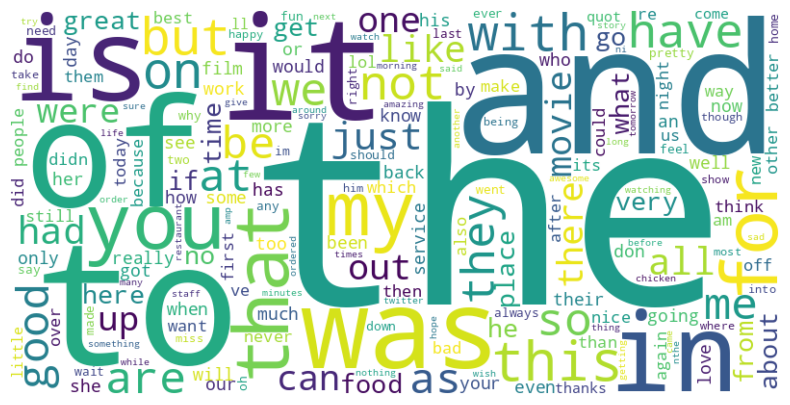

Test Accuracy with CNN-Word2Vec: 0.8338167071342468
Precision: 0.8214844873310541
Recall: 0.8543515103180142
F1 Score: 0.8375956996253462
Total Execution Time: 274.9615843296051


In [ ]:
import time
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from gensim.models import Word2Vec
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Conv1D, GlobalMaxPooling1D, Dense
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.feature_extraction.text import TfidfVectorizer
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Start the timer
start_time = time.time()

# Assuming 'df_review' is loaded with your dataset
# df_review = pd.read_csv('your_dataset.csv')

# Split the data into training, validation, and test sets
X_train, X_temp, y_train, y_temp = train_test_split(
    df_review['text'],
    df_review['sentiment'],
    test_size=0.4,
    random_state=42
)
X_val, X_test, y_val, y_test = train_test_split(
    X_temp,
    y_temp,
    test_size=0.5,
    random_state=42
)

# Tokenize the text data
tokenizer = Tokenizer(num_words=5000)
tokenizer.fit_on_texts(X_train)
X_train_seq = tokenizer.texts_to_sequences(X_train)
X_val_seq = tokenizer.texts_to_sequences(X_val)
X_test_seq = tokenizer.texts_to_sequences(X_test)

max_length = max(max(len(x) for x in X_train_seq), max(len(x) for x in X_val_seq), max(len(x) for x in X_test_seq))
X_train_pad = pad_sequences(X_train_seq, maxlen=max_length)
X_val_pad = pad_sequences(X_val_seq, maxlen=max_length)
X_test_pad = pad_sequences(X_test_seq, maxlen=max_length)

# Train a Word2Vec model
tokenized_texts = [text.split() for text in df_review['text']]
word2vec_model = Word2Vec(tokenized_texts, vector_size=100, window=5, min_count=1, workers=4)

# Prepare the embedding matrix
vocab_size = len(tokenizer.word_index) + 1
embedding_matrix = np.zeros((vocab_size, 100))
for word, i in tokenizer.word_index.items():
    if word in word2vec_model.wv:
        embedding_vector = word2vec_model.wv[word]
        if embedding_vector is not None:
            embedding_matrix[i] = embedding_vector

# Build the neural network with a CNN layer
model = Sequential()
model.add(Embedding(input_dim=vocab_size,
                    output_dim=100,
                    weights=[embedding_matrix],
                    input_length=max_length,
                    trainable=False))
model.add(Conv1D(filters=64, kernel_size=3, activation='relu'))
model.add(GlobalMaxPooling1D())
model.add(Dense(64, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Set early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

# Train the model
model.fit(X_train_pad, y_train, epochs=20, batch_size=64,
          validation_data=(X_val_pad, y_val),
          callbacks=[early_stopping])

# Evaluate on the test set
test_loss, test_accuracy = model.evaluate(X_test_pad, y_test)

# Predict on the test set
y_pred = (model.predict(X_test_pad) > 0.5).astype("int32")

# Calculate precision, recall, and f1 score
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Compute TF-IDF scores for the entire dataset
tfidf_vectorizer = TfidfVectorizer(max_features=5000)
tfidf_matrix = tfidf_vectorizer.fit_transform(df_review['text'])

# Sum the TF-IDF scores for each word across all documents
tfidf_scores = np.sum(tfidf_matrix, axis=0)
tfidf_scores = np.squeeze(np.asarray(tfidf_scores))

# Map words to their TF-IDF scores
word_scores = {word: tfidf_scores[idx] for word, idx in tfidf_vectorizer.vocabulary_.items()}

# Generate and display the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white')
wordcloud.generate_from_frequencies(word_scores)

# Plot the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

# End the timer and calculate total time taken
end_time = time.time()
execution_time = end_time - start_time

print("Test Accuracy with CNN-Word2Vec:", test_accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("Total Execution Time:", execution_time)


### Word2Vec with Dense CNN###

Epoch 1/20
2813/2813 [==============================] - 16s 5ms/step - loss: 0.4293 - accuracy: 0.7933 - val_loss: 0.3916 - val_accuracy: 0.8175
Epoch 2/20
2813/2813 [==============================] - 14s 5ms/step - loss: 0.3705 - accuracy: 0.8290 - val_loss: 0.3838 - val_accuracy: 0.8198
Epoch 3/20
2813/2813 [==============================] - 14s 5ms/step - loss: 0.3526 - accuracy: 0.8381 - val_loss: 0.3785 - val_accuracy: 0.8256
Epoch 4/20
2813/2813 [==============================] - 14s 5ms/step - loss: 0.3395 - accuracy: 0.8453 - val_loss: 0.3583 - val_accuracy: 0.8365
Epoch 5/20
2813/2813 [==============================] - 14s 5ms/step - loss: 0.3294 - accuracy: 0.8507 - val_loss: 0.3600 - val_accuracy: 0.8361
Epoch 6/20
2813/2813 [==============================] - 14s 5ms/step - loss: 0.3210 - accuracy: 0.8543 - val_loss: 0.3709 - val_accuracy: 0.8308
Epoch 7/20
2813/2813 [==============================] - 14s 5ms/step - loss: 0.3145 - accuracy: 0.8585 - val_loss: 0.3554 - val_ac

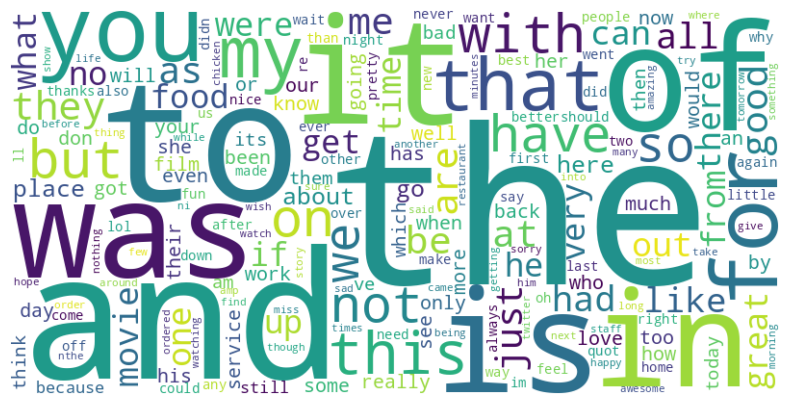

Test Accuracy with Denser CNN-Word2Vec: 0.8391839265823364
Precision: 0.8473142391193558
Recall: 0.8287309341042768
F1 Score: 0.8379195645600243
Total Execution Time: 282.9251024723053


In [ ]:
import time
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from gensim.models import Word2Vec
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Conv1D, GlobalMaxPooling1D, Dense
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.feature_extraction.text import TfidfVectorizer
from wordcloud import WordCloud
import matplotlib.pyplot as plt


start_time = time.time()


X_train, X_temp, y_train, y_temp = train_test_split(
    df_review['text'],
    df_review['sentiment'],
    test_size=0.4,
    random_state=42
)
X_val, X_test, y_val, y_test = train_test_split(
    X_temp,
    y_temp,
    test_size=0.5,
    random_state=42
)

# Tokenize the text data
tokenizer = Tokenizer(num_words=5000)
tokenizer.fit_on_texts(X_train)
X_train_seq = tokenizer.texts_to_sequences(X_train)
X_val_seq = tokenizer.texts_to_sequences(X_val)
X_test_seq = tokenizer.texts_to_sequences(X_test)

max_length = max(max(len(x) for x in X_train_seq), max(len(x) for x in X_val_seq), max(len(x) for x in X_test_seq))
X_train_pad = pad_sequences(X_train_seq, maxlen=max_length)
X_val_pad = pad_sequences(X_val_seq, maxlen=max_length)
X_test_pad = pad_sequences(X_test_seq, maxlen=max_length)

# Train a Word2Vec model
tokenized_texts = [text.split() for text in df_review['text']]
word2vec_model = Word2Vec(tokenized_texts, vector_size=100, window=5, min_count=1, workers=4)

# Prepare the embedding matrix
vocab_size = len(tokenizer.word_index) + 1
embedding_matrix = np.zeros((vocab_size, 100))
for word, i in tokenizer.word_index.items():
    if word in word2vec_model.wv:
        embedding_vector = word2vec_model.wv[word]
        if embedding_vector is not None:
            embedding_matrix[i] = embedding_vector

# Build the neural network with a denser architecture
model = Sequential()
model.add(Embedding(input_dim=vocab_size,
                    output_dim=100,
                    weights=[embedding_matrix],
                    input_length=max_length,
                    trainable=False))
model.add(Conv1D(filters=64, kernel_size=3, activation='relu'))
model.add(GlobalMaxPooling1D())
model.add(Dense(128, activation='relu'))  # Increased units in the first Dense layer
model.add(Dense(64, activation='relu'))   # Additional Dense layer
model.add(Dense(32, activation='relu'))   # Additional Dense layer
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Set early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

# Train the model
model.fit(X_train_pad, y_train, epochs=20, batch_size=64,
          validation_data=(X_val_pad, y_val),
          callbacks=[early_stopping])

# Evaluate on the test set
test_loss, test_accuracy = model.evaluate(X_test_pad, y_test)

# Predict on the test set
y_pred = (model.predict(X_test_pad) > 0.5).astype("int32")

# Calculate precision, recall, and f1 score
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Compute TF-IDF scores for the entire dataset
tfidf_vectorizer = TfidfVectorizer(max_features=5000)
tfidf_matrix = tfidf_vectorizer.fit_transform(df_review['text'])

# Sum the TF-IDF scores for each word across all documents
tfidf_scores = np.sum(tfidf_matrix, axis=0)
tfidf_scores = np.squeeze(np.asarray(tfidf_scores))

# Map words to their TF-IDF scores
word_scores = {word: tfidf_scores[idx] for word, idx in tfidf_vectorizer.vocabulary_.items()}

# Generate and display the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white')
wordcloud.generate_from_frequencies(word_scores)

# Plot the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

# End the timer and calculate total time taken
end_time = time.time()
execution_time = end_time - start_time

print("Test Accuracy with Denser CNN-Word2Vec:", test_accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("Total Execution Time:", execution_time)


### Word2Vec with LSTM ##


Epoch 1/20
2813/2813 [==============================] - 195s 68ms/step - loss: 0.4207 - accuracy: 0.8021 - val_loss: 0.3604 - val_accuracy: 0.8370
Epoch 2/20
2813/2813 [==============================] - 192s 68ms/step - loss: 0.3515 - accuracy: 0.8407 - val_loss: 0.3468 - val_accuracy: 0.8444
Epoch 3/20
2813/2813 [==============================] - 192s 68ms/step - loss: 0.3301 - accuracy: 0.8511 - val_loss: 0.3458 - val_accuracy: 0.8480
Epoch 4/20
2813/2813 [==============================] - 192s 68ms/step - loss: 0.3144 - accuracy: 0.8590 - val_loss: 0.3347 - val_accuracy: 0.8524
Epoch 5/20
2813/2813 [==============================] - 192s 68ms/step - loss: 0.3020 - accuracy: 0.8650 - val_loss: 0.3335 - val_accuracy: 0.8521
Epoch 6/20
2813/2813 [==============================] - 192s 68ms/step - loss: 0.2917 - accuracy: 0.8704 - val_loss: 0.3386 - val_accuracy: 0.8488
Epoch 7/20
2813/2813 [==============================] - 193s 69ms/step - loss: 0.2818 - accuracy: 0.8746 - val_loss: 0

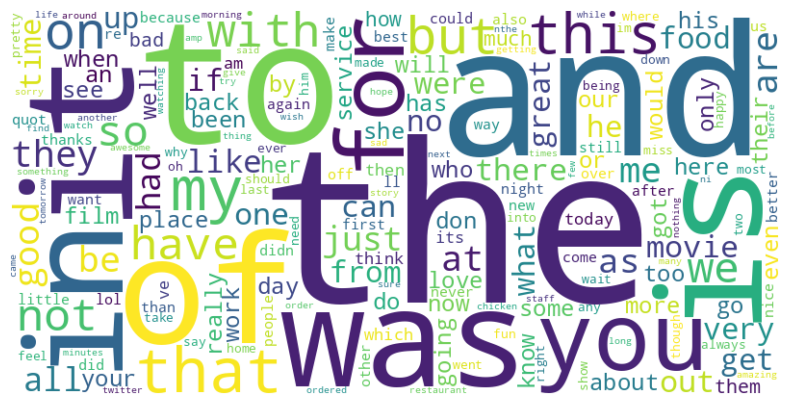

Test Accuracy with LSTM-Word2Vec: 0.852051854133606
Precision: 0.8474209923039135
Recall: 0.8598677433290134
F1 Score: 0.853598997163027
Total Execution Time: 2155.5156247615814


In [ ]:
import time
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from gensim.models import Word2Vec
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.feature_extraction.text import TfidfVectorizer
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Start the timer
start_time = time.time()
X_train, X_temp, y_train, y_temp = train_test_split(
    df_review['text'],
    df_review['sentiment'],
    test_size=0.4,
    random_state=42
)
X_val, X_test, y_val, y_test = train_test_split(
    X_temp,
    y_temp,
    test_size=0.5,
    random_state=42
)

# Tokenize the text data
tokenizer = Tokenizer(num_words=5000)
tokenizer.fit_on_texts(X_train)
X_train_seq = tokenizer.texts_to_sequences(X_train)
X_val_seq = tokenizer.texts_to_sequences(X_val)
X_test_seq = tokenizer.texts_to_sequences(X_test)

max_length = max(max(len(x) for x in X_train_seq), max(len(x) for x in X_val_seq), max(len(x) for x in X_test_seq))
X_train_pad = pad_sequences(X_train_seq, maxlen=max_length)
X_val_pad = pad_sequences(X_val_seq, maxlen=max_length)
X_test_pad = pad_sequences(X_test_seq, maxlen=max_length)

# Train a Word2Vec model
tokenized_texts = [text.split() for text in df_review['text']]
word2vec_model = Word2Vec(tokenized_texts, vector_size=100, window=5, min_count=1, workers=4)

# Prepare the embedding matrix
vocab_size = len(tokenizer.word_index) + 1
embedding_matrix = np.zeros((vocab_size, 100))
for word, i in tokenizer.word_index.items():
    if word in word2vec_model.wv:
        embedding_vector = word2vec_model.wv[word]
        if embedding_vector is not None:
            embedding_matrix[i] = embedding_vector

# Build the neural network with an LSTM layer
model = Sequential()
model.add(Embedding(input_dim=vocab_size,
                    output_dim=100,
                    weights=[embedding_matrix],
                    input_length=max_length,
                    trainable=False))
model.add(LSTM(64))  # LSTM layer with 64 units
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))  # Dropout for regularization
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Set early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

# Train the model
model.fit(X_train_pad, y_train, epochs=20, batch_size=64,
          validation_data=(X_val_pad, y_val),
          callbacks=[early_stopping])

# Evaluate on the test set
test_loss, test_accuracy = model.evaluate(X_test_pad, y_test)

# Predict on the test set
y_pred = (model.predict(X_test_pad) > 0.5).astype("int32")

# Calculate precision, recall, and f1 score
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Compute TF-IDF scores for the entire dataset
tfidf_vectorizer = TfidfVectorizer(max_features=5000)
tfidf_matrix = tfidf_vectorizer.fit_transform(df_review['text'])

# Sum the TF-IDF scores for each word across all documents
tfidf_scores = np.sum(tfidf_matrix, axis=0)
tfidf_scores = np.squeeze(np.asarray(tfidf_scores))

# Map words to their TF-IDF scores
word_scores = {word: tfidf_scores[idx] for word, idx in tfidf_vectorizer.vocabulary_.items()}

# Generate and display the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white')
wordcloud.generate_from_frequencies(word_scores)

# Plot the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

# End the timer and calculate total time taken
end_time = time.time()
execution_time = end_time - start_time

print("Test Accuracy with LSTM-Word2Vec:", test_accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("Total Execution Time:", execution_time)
